In [272]:
import requests
import gzip
import shutil
import pandas as pd
import numpy as np
import time
from IPython.display import display
from geopy.distance import geodesic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

## Data Upload

### Tokyo Q3 Data Upload

In [122]:
url = "https://github.com/HDuo1129/Data-Analysis-3/raw/main/Assignment%202/Dataset/Tokyo/2024%20Q3/listings.csv.gz"
file_path = "listings.csv.gz"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

with gzip.open("listings.csv.gz", "rb") as f_in:
    with open("listings.csv", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [123]:
Tokyo_Q3 = pd.read_csv("listings.csv.gz", compression="gzip")
print(Tokyo_Q3.head())

        id                           listing_url       scrape_id last_scraped  \
0   197677   https://www.airbnb.com/rooms/197677  20240927024131   2024-09-27   
1   776070   https://www.airbnb.com/rooms/776070  20240927024131   2024-09-27   
2   905944   https://www.airbnb.com/rooms/905944  20240927024131   2024-09-27   
3  1016831  https://www.airbnb.com/rooms/1016831  20240927024131   2024-09-27   
4  1196177  https://www.airbnb.com/rooms/1196177  20240927024131   2024-09-27   

        source                                               name  \
0  city scrape                          Oshiage Holiday Apartment   
1  city scrape                             Kero-kero house room 1   
2  city scrape  4F Spacious Apartment in Shinjuku / Shibuya Tokyo   
3  city scrape         5 mins Shibuya Cat modern sunny  Shimokita   
4  city scrape        Stay with host Cozy private room Senju area   

                                         description  \
0                                         

### Tokyo Q4 Data Upload

In [185]:
url = "https://github.com/HDuo1129/Data-Analysis-3/raw/main/Assignment%202/Dataset/Tokyo/2024%20Q4/listings.csv.gz"
file_path = "listings.csv.gz"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

with gzip.open("listings.csv.gz", "rb") as f_in:
    with open("listings.csv", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [187]:
Tokyo_Q4 = pd.read_csv("listings.csv.gz", compression="gzip")
print(Tokyo_Q4.head())

        id                           listing_url       scrape_id last_scraped  \
0   197677   https://www.airbnb.com/rooms/197677  20241230011552   2024-12-30   
1   776070   https://www.airbnb.com/rooms/776070  20241230011552   2024-12-30   
2   905944   https://www.airbnb.com/rooms/905944  20241230011552   2024-12-30   
3  1016831  https://www.airbnb.com/rooms/1016831  20241230011552   2024-12-30   
4  1196177  https://www.airbnb.com/rooms/1196177  20241230011552   2024-12-30   

        source                                               name  \
0  city scrape                          Oshiage Holiday Apartment   
1  city scrape                             Kero-kero house room 1   
2  city scrape  4F Spacious Apartment in Shinjuku / Shibuya Tokyo   
3  city scrape         5 mins Shibuya Cat modern sunny  Shimokita   
4  city scrape   Homestay at Host's House -  Senju-Ohashi Station   

                                         description  \
0                                         

### Bangkok Q3 Data Upload

In [207]:
url = "https://github.com/HDuo1129/Data-Analysis-3/raw/main/Assignment%202/Dataset/Bangkok/2024%20Q3/listings.csv.gz"
file_path = "listings.csv.gz"

response = requests.get(url)
with open(file_path, "wb") as f:
    f.write(response.content)

with gzip.open("listings.csv.gz", "rb") as f_in:
    with open("listings.csv", "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [208]:
Bangkok_Q3 = pd.read_csv("listings.csv.gz", compression="gzip")
print(Bangkok_Q3.head())

      id                         listing_url       scrape_id last_scraped  \
0  27934  https://www.airbnb.com/rooms/27934  20240925020907   2024-09-25   
1  27979  https://www.airbnb.com/rooms/27979  20240925020907   2024-09-25   
2  28745  https://www.airbnb.com/rooms/28745  20240925020907   2024-09-25   
3  35780  https://www.airbnb.com/rooms/35780  20240925020907   2024-09-25   
4  48736  https://www.airbnb.com/rooms/48736  20240925020907   2024-09-25   

            source                                            name  \
0      city scrape                 Nice room with superb city view   
1  previous scrape                  Easy going landlord,easy place   
2  previous scrape               modern-style apartment in Bangkok   
3      city scrape  Spacious one bedroom at The Kris Condo Bldg. 3   
4      city scrape                 Condo with Chaopraya River View   

                                         description  \
0  Our cool and comfortable one bedroom apartment...   
1   

## Data Cleaning

### Tokyo Q3 Data Cleaning

In [126]:
columns_to_drop = [
    "scrape_id", "source", "neighbourhood_group_cleansed", "calendar_updated", "listing_url", "picture_url", 
    "host_url", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "neighbourhood", "calendar_last_scraped",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count_entire_homes", 
    "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "host_id"]
Tokyo_Q3_cleaned = Tokyo_Q3.drop(columns=columns_to_drop)

fillna_dict = {
    "description": "",
    "neighborhood_overview": "",
    "host_about": "",
    "host_location": "Unknown",
    "host_response_time": "Unknown",
    "host_response_rate": "0%",
    "host_acceptance_rate": "0%",
    "bathrooms": Tokyo_Q3_cleaned["bathrooms"].median(),
    "bedrooms": Tokyo_Q3_cleaned["bedrooms"].median(),
    "beds": Tokyo_Q3_cleaned["beds"].median(),
    "review_scores_rating": 0,
    "review_scores_accuracy": 0,
    "review_scores_cleanliness": 0,
    "review_scores_checkin": 0,
    "review_scores_communication": 0,
    "review_scores_location": 0,
    "review_scores_value": 0,
    "reviews_per_month": 0}
Tokyo_Q3_cleaned.fillna(fillna_dict, inplace=True)

In [128]:
# Price Check
Tokyo_Q3_cleaned["price"] = (
    Tokyo_Q3_cleaned["price"]
    .astype(str)
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))

# Rate Check
Tokyo_Q3_cleaned["host_response_rate"] = (
    Tokyo_Q3_cleaned["host_response_rate"]
    .str.replace("%", "")
    .astype(float))
Tokyo_Q3_cleaned["host_acceptance_rate"] = (
    Tokyo_Q3_cleaned["host_acceptance_rate"]
    .str.replace("%", "")
    .astype(float))

# Date Check
date_cols = ["host_since", "first_review", "last_review"]
for col in date_cols:
    Tokyo_Q3_cleaned[col] = pd.to_datetime(Tokyo_Q3_cleaned[col], errors="coerce")

# TF Result Check
bool_cols = ["instant_bookable", "host_is_superhost", "host_identity_verified"]
for col in bool_cols:
    Tokyo_Q3_cleaned[col] = Tokyo_Q3_cleaned[col].map({"t": True, "f": False})

# Calculate Landlord Experience
Tokyo_Q3_cleaned["host_experience"] = 2024 - Tokyo_Q3_cleaned["host_since"].dt.year

# Facility Pick-Up
important_amenities = ["Wifi", "Kitchen", "Washer", "Air conditioning", "Heating", "TV", "Elevator"]
for amenity in important_amenities:
    Tokyo_Q3_cleaned[f"has_{amenity.lower().replace(' ', '_')}"] = Tokyo_Q3_cleaned["amenities"].apply(lambda x: amenity in x)

# Calculate Distance from Centre
tokyo_center = (35.682839, 139.759455)
Tokyo_Q3_cleaned["distance_from_center"] = Tokyo_Q3_cleaned.apply(lambda row: geodesic((row["latitude"], row["longitude"]), tokyo_center).km, axis=1)

In [129]:
columns_to_drop_final = ["bathrooms_text", "host_about", "host_location", "host_verifications",
                         "host_has_profile_pic", "license", "amenities", "latitude", "longitude"]
Tokyo_Q3_cleaned = Tokyo_Q3_cleaned.drop(columns=columns_to_drop_final)
rename_dict = {
    "review_scores_communication": "review_communication_score",
    "review_scores_location": "review_location_score",
    "review_scores_value": "review_value_score",
    "host_total_listings_count": "total_listings_by_host"}
Tokyo_Q3_cleaned.rename(columns=rename_dict, inplace=True)

In [130]:
columns_to_remove = ["last_scraped", "name", "description", "neighborhood_overview", "host_name"]
Tokyo_Q3_cleaned.drop(columns=columns_to_remove, inplace=True, errors="ignore")

In [131]:
Tokyo_Q3_cleaned["host_since"] = pd.to_datetime(Tokyo_Q3_cleaned["host_since"], errors="coerce")
Tokyo_Q3_cleaned["host_experience_years"] = 2024 - Tokyo_Q3_cleaned["host_since"].dt.year
Tokyo_Q3_cleaned.drop(columns=["host_since"], inplace=True)

In [132]:
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4,
    "Unknown": 5}
Tokyo_Q3_cleaned["host_response_time"] = Tokyo_Q3_cleaned["host_response_time"].map(response_time_mapping).fillna(5).astype(int)

In [140]:
binary_columns = ["instant_bookable", "host_is_superhost", "host_identity_verified",
                  "has_wifi", "has_kitchen", "has_washer", "has_air_conditioning",
                  "has_heating", "has_tv", "has_elevator"]

for col in binary_columns:
    if col in Tokyo_Q3_cleaned.columns:
        Tokyo_Q3_cleaned[col] = Tokyo_Q3_cleaned[col].fillna(False).astype(bool).astype(int)

/var/folders/69/fws7qnp96rx9nd3jbrt3d3jw0000gn/T/ipykernel_30342/3490789303.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Tokyo_Q3_cleaned[col] = Tokyo_Q3_cleaned[col].fillna(False).astype(bool).astype(int)


In [144]:
categorical_columns = Tokyo_Q3_cleaned.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    Tokyo_Q3_cleaned[col] = Tokyo_Q3_cleaned[col].astype("category").cat.codes

In [149]:
log_transform_columns = ["price", "reviews_per_month", "distance_from_center"]
for col in log_transform_columns:
    if col in Tokyo_Q3_cleaned.columns and Tokyo_Q3_cleaned[col].min() > 0:
        Tokyo_Q3_cleaned[col] = Tokyo_Q3_cleaned[col].apply(lambda x: np.log1p(x))

In [151]:
print(Tokyo_Q3_cleaned.head())

        id  host_response_time  host_response_rate  host_acceptance_rate  \
0   197677                   3               100.0                  91.0   
1   776070                   1               100.0                 100.0   
2   905944                   1               100.0                 100.0   
3  1016831                   2               100.0                 100.0   
4  1196177                   1               100.0                  93.0   

   host_is_superhost  host_listings_count  total_listings_by_host  \
0                  1                    1                       2   
1                  1                    1                       6   
2                  1                    8                      18   
3                  1                    1                       6   
4                  1                    1                       2   

   host_identity_verified  neighbourhood_cleansed  property_type  ...  \
0                       1                      44      

In [153]:
Tokyo_Q3_cleaned.to_csv("Tokyo_Q3_cleaned.csv", index=False)

### Tokyo Q4 Data Cleaning

In [189]:
columns_to_drop = [
    "scrape_id", "source", "neighbourhood_group_cleansed", "calendar_updated", "listing_url", "picture_url", 
    "host_url", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "neighbourhood", "calendar_last_scraped",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count_entire_homes", 
    "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "host_id"]
Tokyo_Q4_cleaned = Tokyo_Q4.drop(columns=columns_to_drop)

fillna_dict = {
    "description": "",
    "neighborhood_overview": "",
    "host_about": "",
    "host_location": "Unknown",
    "host_response_time": "Unknown",
    "host_response_rate": "0%",
    "host_acceptance_rate": "0%",
    "bathrooms": Tokyo_Q4_cleaned["bathrooms"].median(),
    "bedrooms": Tokyo_Q4_cleaned["bedrooms"].median(),
    "beds": Tokyo_Q4_cleaned["beds"].median(),
    "review_scores_rating": 0,
    "review_scores_accuracy": 0,
    "review_scores_cleanliness": 0,
    "review_scores_checkin": 0,
    "review_scores_communication": 0,
    "review_scores_location": 0,
    "review_scores_value": 0,
    "reviews_per_month": 0}
Tokyo_Q4_cleaned.fillna(fillna_dict, inplace=True)

In [191]:
# Price Check
Tokyo_Q4_cleaned["price"] = (
    Tokyo_Q4_cleaned["price"]
    .astype(str)
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))

# Rate Check
Tokyo_Q4_cleaned["host_response_rate"] = (
    Tokyo_Q4_cleaned["host_response_rate"]
    .str.replace("%", "")
    .astype(float))
Tokyo_Q4_cleaned["host_acceptance_rate"] = (
    Tokyo_Q4_cleaned["host_acceptance_rate"]
    .str.replace("%", "")
    .astype(float))

# Date Check
date_cols = ["host_since", "first_review", "last_review"]
for col in date_cols:
    Tokyo_Q4_cleaned[col] = pd.to_datetime(Tokyo_Q4_cleaned[col], errors="coerce")

# TF Result Check
bool_cols = ["instant_bookable", "host_is_superhost", "host_identity_verified"]
for col in bool_cols:
    Tokyo_Q4_cleaned[col] = Tokyo_Q4_cleaned[col].map({"t": True, "f": False})

# Calculate Landlord Experience
Tokyo_Q4_cleaned["host_experience"] = 2024 - Tokyo_Q4_cleaned["host_since"].dt.year

# Facility Pick-Up
important_amenities = ["Wifi", "Kitchen", "Washer", "Air conditioning", "Heating", "TV", "Elevator"]
for amenity in important_amenities:
    Tokyo_Q4_cleaned[f"has_{amenity.lower().replace(' ', '_')}"] = Tokyo_Q4_cleaned["amenities"].apply(lambda x: amenity in x)

# Calculate Distance from Centre
tokyo_center = (35.682839, 139.759455)
Tokyo_Q4_cleaned["distance_from_center"] = Tokyo_Q4_cleaned.apply(lambda row: geodesic((row["latitude"], row["longitude"]), tokyo_center).km, axis=1)

In [193]:
columns_to_drop_final = ["bathrooms_text", "host_about", "host_location", "host_verifications",
                         "host_has_profile_pic", "license", "amenities", "latitude", "longitude"]
Tokyo_Q4_cleaned = Tokyo_Q4_cleaned.drop(columns=columns_to_drop_final)
rename_dict = {
    "review_scores_communication": "review_communication_score",
    "review_scores_location": "review_location_score",
    "review_scores_value": "review_value_score",
    "host_total_listings_count": "total_listings_by_host"}
Tokyo_Q4_cleaned.rename(columns=rename_dict, inplace=True)

In [195]:
columns_to_remove = ["last_scraped", "name", "description", "neighborhood_overview", "host_name"]
Tokyo_Q4_cleaned.drop(columns=columns_to_remove, inplace=True, errors="ignore")
Tokyo_Q4_cleaned["host_since"] = pd.to_datetime(Tokyo_Q4_cleaned["host_since"], errors="coerce")
Tokyo_Q4_cleaned["host_experience_years"] = 2024 - Tokyo_Q4_cleaned["host_since"].dt.year
Tokyo_Q4_cleaned.drop(columns=["host_since"], inplace=True)

In [197]:
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4,
    "Unknown": 5}
Tokyo_Q4_cleaned["host_response_time"] = Tokyo_Q4_cleaned["host_response_time"].map(response_time_mapping).fillna(5).astype(int)

In [199]:
binary_columns = ["instant_bookable", "host_is_superhost", "host_identity_verified",
                  "has_wifi", "has_kitchen", "has_washer", "has_air_conditioning",
                  "has_heating", "has_tv", "has_elevator"]

for col in binary_columns:
    if col in Tokyo_Q4_cleaned.columns:
        Tokyo_Q4_cleaned[col] = Tokyo_Q4_cleaned[col].fillna(False).astype(bool).astype(int)

/var/folders/69/fws7qnp96rx9nd3jbrt3d3jw0000gn/T/ipykernel_30342/2494643412.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Tokyo_Q4_cleaned[col] = Tokyo_Q4_cleaned[col].fillna(False).astype(bool).astype(int)
/var/folders/69/fws7qnp96rx9nd3jbrt3d3jw0000gn/T/ipykernel_30342/2494643412.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Tokyo_Q4_cleaned[col] = Tokyo_Q4_cleaned[col].fillna(False).astype(bool).astype(int)


In [201]:
categorical_columns = Tokyo_Q4_cleaned.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    Tokyo_Q4_cleaned[col] = Tokyo_Q4_cleaned[col].astype("category").cat.codes

In [203]:
log_transform_columns = ["price", "reviews_per_month", "distance_from_center"]
for col in log_transform_columns:
    if col in Tokyo_Q4_cleaned.columns and Tokyo_Q4_cleaned[col].min() > 0:
        Tokyo_Q4_cleaned[col] = Tokyo_Q4_cleaned[col].apply(lambda x: np.log1p(x))

In [205]:
print(Tokyo_Q4_cleaned.head())
Tokyo_Q4_cleaned.to_csv("Tokyo_Q4_cleaned.csv", index=False)

        id  host_response_time  host_response_rate  host_acceptance_rate  \
0   197677                   3               100.0                  93.0   
1   776070                   1               100.0                 100.0   
2   905944                   1               100.0                 100.0   
3  1016831                   2               100.0                 100.0   
4  1196177                   1               100.0                  92.0   

   host_is_superhost  host_listings_count  total_listings_by_host  \
0                  1                  1.0                     2.0   
1                  1                  1.0                     6.0   
2                  1                  9.0                    18.0   
3                  1                  1.0                     6.0   
4                  1                  1.0                     2.0   

   host_identity_verified  neighbourhood_cleansed  property_type  ...  \
0                       1                      44      

### Bangkok Q3 Data Cleaning

In [211]:
columns_to_drop = [
    "scrape_id", "source", "neighbourhood_group_cleansed", "calendar_updated", "listing_url", "picture_url", 
    "host_url", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "neighbourhood", "calendar_last_scraped",
    "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights", 
    "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calculated_host_listings_count_entire_homes", 
    "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "host_id"]
Bangkok_Q3_cleaned = Bangkok_Q3.drop(columns=columns_to_drop)

fillna_dict = {
    "description": "",
    "neighborhood_overview": "",
    "host_about": "",
    "host_location": "Unknown",
    "host_response_time": "Unknown",
    "host_response_rate": "0%",
    "host_acceptance_rate": "0%",
    "bathrooms": Bangkok_Q3_cleaned["bathrooms"].median(),
    "bedrooms": Bangkok_Q3_cleaned["bedrooms"].median(),
    "beds": Bangkok_Q3_cleaned["beds"].median(),
    "review_scores_rating": 0,
    "review_scores_accuracy": 0,
    "review_scores_cleanliness": 0,
    "review_scores_checkin": 0,
    "review_scores_communication": 0,
    "review_scores_location": 0,
    "review_scores_value": 0,
    "reviews_per_month": 0}
Bangkok_Q3_cleaned.fillna(fillna_dict, inplace=True)

In [213]:
# Price Check
Bangkok_Q3_cleaned["price"] = (
    Bangkok_Q3_cleaned["price"]
    .astype(str)
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(float))

# Rate Check
Bangkok_Q3_cleaned["host_response_rate"] = (
    Bangkok_Q3_cleaned["host_response_rate"]
    .str.replace("%", "")
    .astype(float))
Bangkok_Q3_cleaned["host_acceptance_rate"] = (
    Bangkok_Q3_cleaned["host_acceptance_rate"]
    .str.replace("%", "")
    .astype(float))

# Date Check
date_cols = ["host_since", "first_review", "last_review"]
for col in date_cols:
    Bangkok_Q3_cleaned[col] = pd.to_datetime(Bangkok_Q3_cleaned[col], errors="coerce")

# TF Result Check
bool_cols = ["instant_bookable", "host_is_superhost", "host_identity_verified"]
for col in bool_cols:
    Bangkok_Q3_cleaned[col] = Bangkok_Q3_cleaned[col].map({"t": True, "f": False})

# Calculate Landlord Experience
Bangkok_Q3_cleaned["host_experience"] = 2024 - Bangkok_Q3_cleaned["host_since"].dt.year

# Facility Pick-Up
important_amenities = ["Wifi", "Kitchen", "Washer", "Air conditioning", "Heating", "TV", "Elevator"]
for amenity in important_amenities:
    Bangkok_Q3_cleaned[f"has_{amenity.lower().replace(' ', '_')}"] = Bangkok_Q3_cleaned["amenities"].apply(lambda x: amenity in x)

# Calculate Distance from Centre
bangkok_center = (13.7563, 100.5018)
Bangkok_Q3_cleaned["distance_from_center"] = Bangkok_Q3_cleaned.apply(lambda row: geodesic((row["latitude"], row["longitude"]), bangkok_center).km, axis=1)

In [215]:
columns_to_drop_final = ["bathrooms_text", "host_about", "host_location", "host_verifications",
                         "host_has_profile_pic", "license", "amenities", "latitude", "longitude"]
Bangkok_Q3_cleaned = Bangkok_Q3_cleaned.drop(columns=columns_to_drop_final)
rename_dict = {
    "review_scores_communication": "review_communication_score",
    "review_scores_location": "review_location_score",
    "review_scores_value": "review_value_score",
    "host_total_listings_count": "total_listings_by_host"}
Bangkok_Q3_cleaned.rename(columns=rename_dict, inplace=True)

In [217]:
columns_to_remove = ["last_scraped", "name", "description", "neighborhood_overview", "host_name"]
Bangkok_Q3_cleaned.drop(columns=columns_to_remove, inplace=True, errors="ignore")
Bangkok_Q3_cleaned["host_since"] = pd.to_datetime(Bangkok_Q3_cleaned["host_since"], errors="coerce")
Bangkok_Q3_cleaned["host_experience_years"] = 2024 - Bangkok_Q3_cleaned["host_since"].dt.year
Bangkok_Q3_cleaned.drop(columns=["host_since"], inplace=True)

In [219]:
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4,
    "Unknown": 5}
Bangkok_Q3_cleaned["host_response_time"] = Bangkok_Q3_cleaned["host_response_time"].map(response_time_mapping).fillna(5).astype(int)

In [221]:
binary_columns = ["instant_bookable", "host_is_superhost", "host_identity_verified",
                  "has_wifi", "has_kitchen", "has_washer", "has_air_conditioning",
                  "has_heating", "has_tv", "has_elevator"]

for col in binary_columns:
    if col in Bangkok_Q3_cleaned.columns:
        Bangkok_Q3_cleaned[col] = Bangkok_Q3_cleaned[col].fillna(False).astype(bool).astype(int)

/var/folders/69/fws7qnp96rx9nd3jbrt3d3jw0000gn/T/ipykernel_30342/462647858.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Bangkok_Q3_cleaned[col] = Bangkok_Q3_cleaned[col].fillna(False).astype(bool).astype(int)


In [223]:
categorical_columns = Bangkok_Q3_cleaned.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    Bangkok_Q3_cleaned[col] = Bangkok_Q3_cleaned[col].astype("category").cat.codes

log_transform_columns = ["price", "reviews_per_month", "distance_from_center"]
for col in log_transform_columns:
    if col in Bangkok_Q3_cleaned.columns and Bangkok_Q3_cleaned[col].min() > 0:
        Bangkok_Q3_cleaned[col] = Bangkok_Q3_cleaned[col].apply(lambda x: np.log1p(x))

In [225]:
print(Bangkok_Q3_cleaned.head())
Bangkok_Q3_cleaned.to_csv("Bangkok_Q3_cleaned.csv", index=False)

      id  host_response_time  host_response_rate  host_acceptance_rate  \
0  27934                   1               100.0                  92.0   
1  27979                   5                 0.0                   0.0   
2  28745                   5                 0.0                   0.0   
3  35780                   1               100.0                  93.0   
4  48736                   5                 0.0                 100.0   

   host_is_superhost  host_listings_count  total_listings_by_host  \
0                  0                    2                       2   
1                  0                    2                       4   
2                  0                    1                       1   
3                  0                    2                       5   
4                  0                    1                       1   

   host_identity_verified  neighbourhood_cleansed  property_type  ...  \
0                       1                      37              7  .

## Data Analysis

### Tokyo Q3 Data Analysis

In [155]:
numeric_features = Tokyo_Q3_cleaned.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_features if col not in ["id", "price"]]
Tokyo_Q3_cleaned[features] = Tokyo_Q3_cleaned[features].astype(float)
scaler = StandardScaler()
Tokyo_Q3_cleaned[features] = scaler.fit_transform(Tokyo_Q3_cleaned[features])

In [157]:
X = Tokyo_Q3_cleaned[features]
y = Tokyo_Q3_cleaned["price"].fillna(Tokyo_Q3_cleaned["price"].median())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [159]:
models = {"OLS": LinearRegression(),
          "LASSO": Lasso(alpha=0.01, max_iter=5000),
          "Random Forest": RandomForestRegressor(n_estimators=50, random_state=42),
          "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
          "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)}

In [173]:
def get_rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

def cross_val_rmse(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    return np.sqrt(-mse_scores.mean())

In [175]:
def evaluate_models(models, X_train, X_test, y_train, y_test, X, y):
    results = []
    fitted_models = {}
    
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - start_time

        y_pred = model.predict(X_test)
        rmse = get_rmse(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        cv_rmse = cross_val_rmse(model, X, y)
        cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
        cv_rmse = np.sqrt(-cv_scores.mean())

        results.append([name, rmse, cv_rmse, r2, training_time])
        fitted_models[name] = model

    columns = ["Model", "RMSE", "CV-RMSE", "R2 Score", "Training Time"]
    results_df = pd.DataFrame(results, columns=columns)
    return results_df.sort_values(by="RMSE")

results_df = evaluate_models(models, X_train, X_test, y_train, y_test, X, y)
print("Horserace Table: Model Performance Comparison")
print(results_df)

Horserace Table: Model Performance Comparison
               Model      RMSE   CV-RMSE  R2 Score  Training Time
4            XGBoost  0.321037  0.367360  0.736746       1.009687
2      Random Forest  0.330408  0.388508  0.721153      12.168352
3  Gradient Boosting  0.367575  0.388487  0.654890       9.454523
0                OLS  0.441133  0.459227  0.502945       0.025872
1              LASSO  0.451822  0.466746  0.478565       0.017134


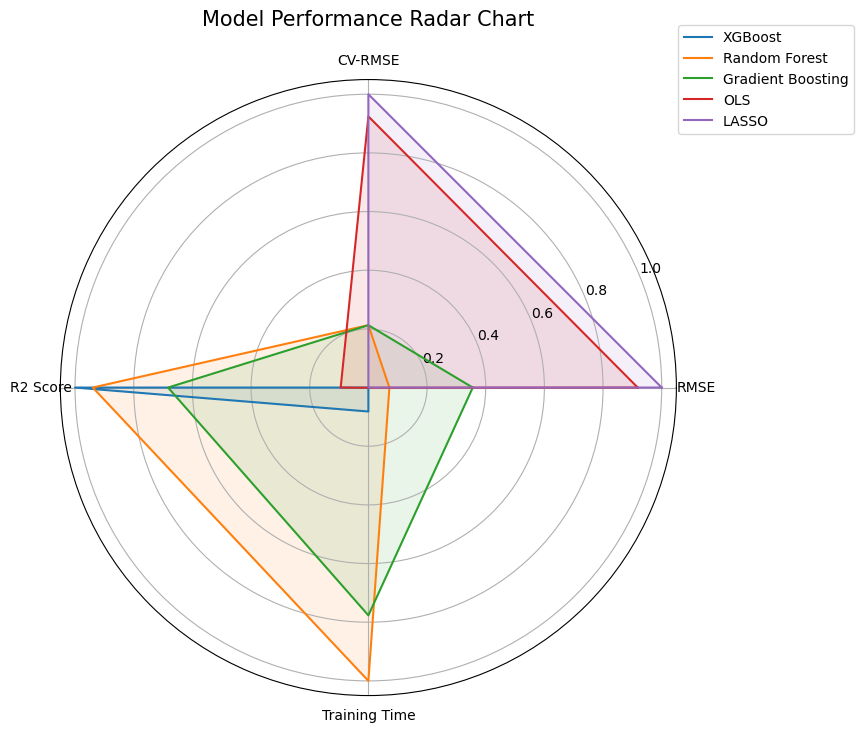

In [177]:
# Radargram Visualisation Results
labels = ["RMSE", "CV-RMSE", "R2 Score", "Training Time"]
num_vars = len(labels)

df_plot = results_df.copy()
df_plot.set_index("Model", inplace=True)
df_norm = (df_plot - df_plot.min()) / (df_plot.max() - df_plot.min())

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for model_name, row in df_norm.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, label=model_name)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title("Model Performance Radar Chart", size=15, pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


Random Forest Top 10 Features
                   Feature  Importance
10            accommodates    0.341205
42    distance_from_center    0.087963
20        availability_365    0.044038
12                bedrooms    0.042321
11               bathrooms    0.040598
7   neighbourhood_cleansed    0.037030
13                    beds    0.033308
18         availability_60    0.025222
8            property_type    0.024636
19         availability_90    0.022556

XGBoost Top 10 Features
                      Feature  Importance
10               accommodates    0.272517
12                   bedrooms    0.099705
11                  bathrooms    0.067978
9                   room_type    0.048663
41               has_elevator    0.036568
42       distance_from_center    0.028461
13                       beds    0.025326
26  review_scores_cleanliness    0.022910
39                has_heating    0.022891
40                     has_tv    0.020876


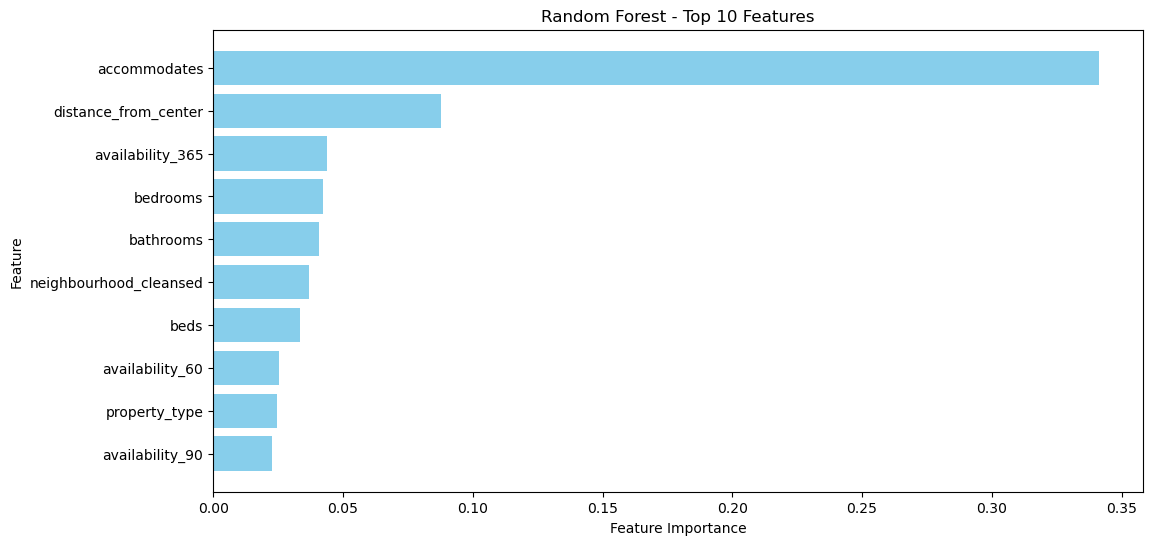

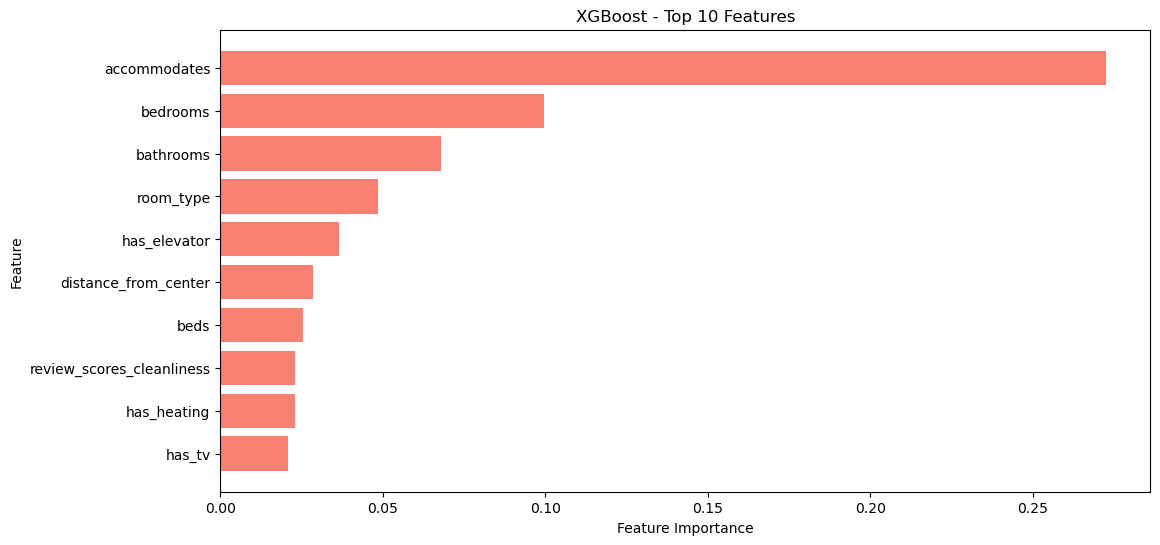

In [181]:
rf_model = models["Random Forest"]
xgb_model = models["XGBoost"]

rf_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
xgb_importance = pd.DataFrame({"Feature": X.columns, "Importance": xgb_model.feature_importances_})

# Choose top 10
rf_top10 = rf_importance.sort_values(by="Importance", ascending=False).head(10)
xgb_top10 = xgb_importance.sort_values(by="Importance", ascending=False).head(10)

print("Random Forest Top 10 Features")
print(rf_top10)
print("\nXGBoost Top 10 Features")
print(xgb_top10)

plt.figure(figsize=(12, 6))
plt.barh(rf_top10["Feature"], rf_top10["Importance"], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest - Top 10 Features")
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(12, 6))
plt.barh(xgb_top10["Feature"], xgb_top10["Importance"], color='salmon')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost - Top 10 Features")
plt.gca().invert_yaxis()
plt.show()

### Validity

#### Tokyo Q4

In [229]:
numeric_features = Tokyo_Q4_cleaned.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_features if col not in ["id", "price"]]
Tokyo_Q4_cleaned[features] = Tokyo_Q4_cleaned[features].astype(float)
scaler = StandardScaler()
Tokyo_Q4_cleaned[features] = scaler.fit_transform(Tokyo_Q4_cleaned[features])

In [233]:
X_Tokyo_Q4 = Tokyo_Q4_cleaned[features]
y_Tokyo_Q4 = Tokyo_Q4_cleaned["price"].fillna(Tokyo_Q4_cleaned["price"].median())

X_train_Tokyo_Q4, X_test_Tokyo_Q4, y_train_Tokyo_Q4, y_test_Tokyo_Q4 = train_test_split(
    X_Tokyo_Q4, y_Tokyo_Q4, test_size=0.2, random_state=42)

X_train_Tokyo_Q4.fillna(X_train_Tokyo_Q4.median(), inplace=True)
X_test_Tokyo_Q4.fillna(X_test_Tokyo_Q4.median(), inplace=True)

In [237]:
def get_rmse_Tokyo_Q4(actual_Tokyo_Q4, pred_Tokyo_Q4):
    return np.sqrt(mean_squared_error(actual_Tokyo_Q4, pred_Tokyo_Q4))

def cross_val_rmse_Tokyo_Q4(model, X_Tokyo_Q4, y_Tokyo_Q4, k=5):
    kf_Tokyo_Q4 = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores_Tokyo_Q4 = cross_val_score(
        model, 
        X_Tokyo_Q4, 
        y_Tokyo_Q4, 
        scoring='neg_mean_squared_error', 
        cv=kf_Tokyo_Q4)
    return np.sqrt(-mse_scores_Tokyo_Q4.mean())

In [248]:
results_df_Tokyo_Q4 = evaluate_models(models, X_train_Tokyo_Q4, X_test_Tokyo_Q4, 
                                      y_train_Tokyo_Q4, y_test_Tokyo_Q4, X_Tokyo_Q4, y_Tokyo_Q4)

print("Horserace Table: Model Performance Comparison for Tokyo_Q4")
print(results_df_Tokyo_Q4)

Horserace Table: Model Performance Comparison for Tokyo_Q4
               Model      RMSE   CV-RMSE  R2 Score  Training Time
2      Random Forest  0.379098  0.440083  0.671968      13.169984
4            XGBoost  0.384353  0.424673  0.662811       0.507627
3  Gradient Boosting  0.434038  0.443611  0.570001      10.021417
0                OLS  0.492036  0.493609  0.447406       0.030289
1              LASSO  0.497970  0.494033  0.433998       0.015461


#### Bangkok Q3

In [231]:
numeric_features = Bangkok_Q3_cleaned.select_dtypes(include=[np.number]).columns.tolist()
features = [col for col in numeric_features if col not in ["id", "price"]]
Bangkok_Q3_cleaned[features] = Bangkok_Q3_cleaned[features].astype(float)
scaler = StandardScaler()
Bangkok_Q3_cleaned[features] = scaler.fit_transform(Bangkok_Q3_cleaned[features])

In [235]:
X_Bangkok_Q3 = Bangkok_Q3_cleaned[features]
y_Bangkok_Q3 = Bangkok_Q3_cleaned["price"].fillna(Bangkok_Q3_cleaned["price"].median())

X_train_Bangkok_Q3, X_test_Bangkok_Q3, y_train_Bangkok_Q3, y_test_Bangkok_Q3 = train_test_split(
    X_Bangkok_Q3, y_Bangkok_Q3, test_size=0.2, random_state=42)

X_train_Bangkok_Q3.fillna(X_train_Bangkok_Q3.median(), inplace=True)
X_test_Bangkok_Q3.fillna(X_test_Bangkok_Q3.median(), inplace=True)

In [239]:
def get_rmse_Bangkok_Q3(actual_Bangkok_Q3, pred_Bangkok_Q3):
    return np.sqrt(mean_squared_error(actual_Bangkok_Q3, pred_Bangkok_Q3))

def cross_val_rmse_Bangkok_Q3(model, X_Bangkok_Q3, y_Bangkok_Q3, k=5):
    kf_Bangkok_Q3 = KFold(n_splits=k, shuffle=True, random_state=42)
    mse_scores_Bangkok_Q3 = cross_val_score(
        model, 
        X_Bangkok_Q3, 
        y_Bangkok_Q3, 
        scoring='neg_mean_squared_error', 
        cv=kf_Bangkok_Q3)
    return np.sqrt(-mse_scores_Bangkok_Q3.mean())

In [247]:
results_df_Bangkok_Q3 = evaluate_models(models, X_train_Bangkok_Q3, X_test_Bangkok_Q3, 
                                        y_train_Bangkok_Q3, y_test_Bangkok_Q3, X_Bangkok_Q3, y_Bangkok_Q3)

print("Horserace Table: Model Performance Comparison for Bangkok_Q3")
print(results_df_Bangkok_Q3)

Horserace Table: Model Performance Comparison for Bangkok_Q3
               Model      RMSE   CV-RMSE  R2 Score  Training Time
4            XGBoost  0.407858  0.438077  0.644460       0.558937
2      Random Forest  0.416754  0.455434  0.628781      15.529873
3  Gradient Boosting  0.462444  0.466051  0.542923      10.741697
0                OLS  0.568486  0.552513  0.309267       0.043091
1              LASSO  0.572417  0.554504  0.299680       0.068877


#### Comparison of the 3 Datasets

In [278]:
results_df["Dataset"] = "Original"
results_df_Tokyo_Q4["Dataset"] = "Tokyo_Q4"
results_df_Bangkok_Q3["Dataset"] = "Bangkok_Q3"

combined_results = pd.concat([results_df, results_df_Tokyo_Q4, results_df_Bangkok_Q3], ignore_index=True)
combined_results = combined_results.pivot(index="Model", columns="Dataset")

display(combined_results)
print(combined_results)

RMSE                        CV-RMSE            \
Dataset           Bangkok_Q3  Original  Tokyo_Q4 Bangkok_Q3  Original   
Model                                                                   
Gradient Boosting   0.462444  0.367575  0.434038   0.466051  0.388487   
LASSO               0.572417  0.451822  0.497970   0.554504  0.466746   
OLS                 0.568486  0.441133  0.492036   0.552513  0.459227   
Random Forest       0.416754  0.330408  0.379098   0.455434  0.388508   
XGBoost             0.407858  0.321037  0.384353   0.438077  0.367360   

                              R2 Score                     Training Time  \
Dataset            Tokyo_Q4 Bangkok_Q3  Original  Tokyo_Q4    Bangkok_Q3   
Model                                                                      
Gradient Boosting  0.443611   0.542923  0.654890  0.570001     10.741697   
LASSO              0.494033   0.299680  0.478565  0.433998      0.068877   
OLS                0.493609   0.309267  0.502945  0.447406      0.043091   
Random Forest      0.440083   0.628781  0.721153  0.671968     15.529873   
XGBoost            0.424673   0.644460  0.736746  0.662811      0.558937   

                                         
Dataset             Original   Tokyo_Q4  
Model                                    
Gradient Boosting   9.454523  10.021417  
LASSO               0.017134   0.015461  
OLS                 0.025872   0.030289  
Random Forest      12.168352  13.169984  
XGBoost             1.009687   0.507627

                        RMSE                        CV-RMSE            \
Dataset           Bangkok_Q3  Original  Tokyo_Q4 Bangkok_Q3  Original   
Model                                                                   
Gradient Boosting   0.462444  0.367575  0.434038   0.466051  0.388487   
LASSO               0.572417  0.451822  0.497970   0.554504  0.466746   
OLS                 0.568486  0.441133  0.492036   0.552513  0.459227   
Random Forest       0.416754  0.330408  0.379098   0.455434  0.388508   
XGBoost             0.407858  0.321037  0.384353   0.438077  0.367360   

                              R2 Score                     Training Time  \
Dataset            Tokyo_Q4 Bangkok_Q3  Original  Tokyo_Q4    Bangkok_Q3   
Model                                                                      
Gradient Boosting  0.443611   0.542923  0.654890  0.570001     10.741697   
LASSO              0.494033   0.299680  0.478565  0.433998      0.068877   
OLS                0.493609   0.309